In [2]:
%cd /work/adapting-CLIP-VGPs/
from skimage.segmentation import slic
# from utils.vgp_data import FlickrVGPsDataset

# test_dataset = FlickrVGPsDataset(data_type='train')

/work/adapting-CLIP-VGPs


(-0.5, 223.5, 223.5, -0.5)

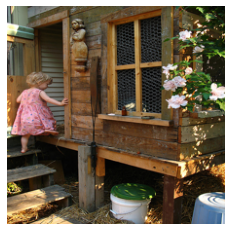

In [3]:
import matplotlib.pyplot as plt
from PIL import Image
import numpy as np

img_path = 'data/flickr/flickr30k_images/1000268201.jpg'
pil_img = Image.open(img_path).convert("RGB").resize((224,224))
np_img = np.array(pil_img)
plt.imshow(np_img)
plt.axis('off')

In [4]:
n_segments = [10, 50, 100, 200]
temperature=1
compactness=50
sigma=0

segments_slic0 = slic(np_img.astype(np.float32)/255, n_segments=n_segments[0], compactness=compactness, sigma=sigma)

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:6: FutureWarning: skimage.measure.label's indexing starts from 0. In future version it will start from 1. To disable this warning, explicitely set the `start_label` parameter to 1.
  


[[[0.31764706 0.34117647 0.37647059]
  [0.44313725 0.50980392 0.49803922]
  [0.46666667 0.54901961 0.52156863]
  ...
  [0.01568627 0.00784314 0.00784314]
  [0.02352941 0.02352941 0.01568627]
  [0.01960784 0.02745098 0.01960784]]

 [[0.30588235 0.3254902  0.35686275]
  [0.45098039 0.51764706 0.51372549]
  [0.48235294 0.56862745 0.54509804]
  ...
  [0.03137255 0.03137255 0.02745098]
  [0.02352941 0.03529412 0.02352941]
  [0.05098039 0.08627451 0.02352941]]

 [[0.29803922 0.30196078 0.35686275]
  [0.46666667 0.52941176 0.54117647]
  [0.48627451 0.58039216 0.55686275]
  ...
  [0.03137255 0.03529412 0.01960784]
  [0.02745098 0.05098039 0.02352941]
  [0.04313725 0.09803922 0.02745098]]

 ...

 [[0.7254902  0.41568627 0.10980392]
  [0.54901961 0.2627451  0.08627451]
  [0.62352941 0.43137255 0.24705882]
  ...
  [0.8627451  0.89411765 0.94509804]
  [0.63529412 0.71372549 0.82352941]
  [0.64705882 0.72156863 0.79607843]]

 [[0.68235294 0.36078431 0.06666667]
  [0.69411765 0.52156863 0.18823529]


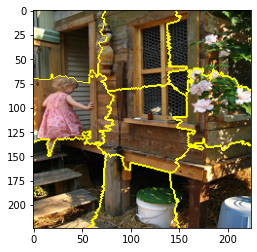

In [8]:
from skimage.segmentation import mark_boundaries
print(mark_boundaries(np_img,segments_slic0))
plt.imshow(mark_boundaries(np_img,segments_slic0))

In [12]:
masks = []
# Do SLIC with different number of segments so that it has a hierarchical scale structure
# This can average out spurious activations that happens sometimes when the segments are too small
for n in n_segments:
    segments_slic = slic(np_img.astype(
        np.float32)/255., n_segments=n, compactness=compactness, sigma=sigma)
    for i in np.unique(segments_slic):
        mask = segments_slic == i
        masks.append(mask)
masks = np.stack(masks, 0)

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:6: FutureWarning: skimage.measure.label's indexing starts from 0. In future version it will start from 1. To disable this warning, explicitely set the `start_label` parameter to 1.
  


In [11]:
import matplotlib.image

path = '/work/adapting-CLIP-VGPs/demo_superpixels'

for n in n_segments:
    segments_slic = slic(np_img.astype(
        np.float32)/255., n_segments=n, compactness=compactness, sigma=sigma)

    boundaries_img = mark_boundaries(np_img, segments_slic)
    matplotlib.image.imsave(f'{path}/{n}_segments.png', boundaries_img)

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:7: FutureWarning: skimage.measure.label's indexing starts from 0. In future version it will start from 1. To disable this warning, explicitely set the `start_label` parameter to 1.
  import sys


In [13]:
path = '/work/adapting-CLIP-VGPs/demo_masks'

for i, mask in enumerate(masks):
    matplotlib.image.imsave(f'{path}/{i}.png', mask)